# Deep Learning Theoretical Aspects - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


Given N linear layers, each of form wnX + bn, we can write the network as:
(wn....(w3(w2(w1X + b1) + b2) + b3).... + bn)
which can be rewritten to:

wn..w3w2w1X + b1w2w3... + b2w3... + b3...+ bn

which is a linear function and thus the network can be rewritten as a single layer network with this function as its activation.
More generally, any linear combination of linear function is a linear function.

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

sigmoid(t)(1 - sigmoid(t))

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

0 if x < 0

1 if x > 0

undefined at 0

3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">

DiSj = 

Si(1 - Si), if i == j

-SiSj, if i != j

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations.  
Use these values -  
*x1 = 1, x2 = 3, x3 = -2, x4 = 2*

```
z = x1 + 5*x2 - 3*x3^2
```

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

In [0]:
# Write your answer here

```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

In [0]:
# Write your answer here

### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

#### Apply to arrays
Apply the convolutions above to the following array:


In [8]:
x = np.array([[-1, -3, -4,  0, -1],
              [ 2, -2, -4,  0, -2],
              [-3, -2,  2,  2,  3],
              [ 0, -3, -4, -4, -2],
              [-4, -2,  2,  0,  1]])

In [63]:
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

In [32]:
from scipy import signal
signal.convolve2d(x, k1, boundary='fill', mode='full')
# 1. 3 X 3
# 2. 2 X 2
# 3. 7 X 7
# 4. 3 X 3

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, -1, -3, -4,  0, -1,  0],
       [ 0,  2, -2, -4,  0, -2,  0],
       [ 0, -3, -2,  2,  2,  3,  0],
       [ 0,  0, -3, -4, -4, -2,  0],
       [ 0, -4, -2,  2,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

In [0]:
N = Input size
F = Filter size
P = Padding size
S = Stride size

Output size = (W−F+2P)/S + 1

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

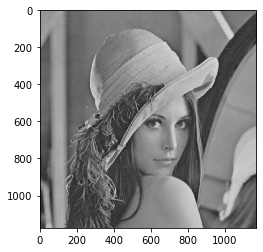

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)

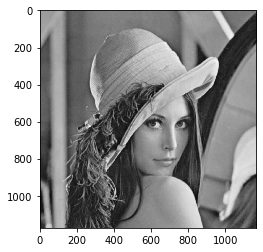

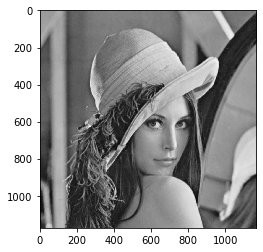

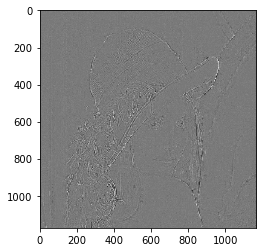

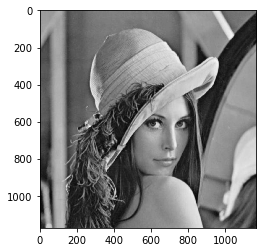

In [65]:
gray = im[:,:,0]
for k in [k1, k2, k3, k4]:
    con = signal.convolve2d(gray, k, boundary='fill', mode='valid')
    plt.imshow(con, cmap='gray')
    plt.show()

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data (images of size 28x28, with a single grayscale depth dimension):

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


In [0]:
# Write your answer here

### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.

In [0]:
# Write your answer here

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

In [0]:
# Write your answer here

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [0]:
# Write your answer here